<h1 style="font-size:5rem;color:orange;">FIFA20 EDA & CLUSTERING</h1

# STEP 1 : Business Case
1. EDA on FIFA20 players.
2. Clustering players based on skill set (Unsupervised Learning)
3. Explore the data and attempt all the below asked questions in a step by step manner:
     ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
     ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
     ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

# STEP 2 : Data Collection
1. Import modules needed.
2. Import file.

In [1]:
# import modules
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# to be continued based on what modules we need on the next step

In [2]:
# import file
fifa20 = pd.read_csv('players_20.csv')
fifa20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

# Domain Analysis
●Name: Name of the player. 
●Age: Age of the player.
●Height: Height of the player in inches (transformed to centimeters in preprocessing).
●Overall: General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on using their whole skillset.
●Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.
●PreferredFoot: Right or Left. Label encoder is applied as 0 for left and 1 for right.
●WeakFoot: Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
●WorkRate: Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.
●Position: Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals. They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages. 
●ST: Positional skill. Player’s general ability when playing in ST position rated between 1-99.
●RS: Positional skill. Player’s general ability when playing in in RS position rated between 1-99.
●LS: Positional skill. Player’s general ability when playing in in LS position rated between 1-99.
●CF: Positional skill. Player’s general ability when playing in in CF position rated between 1-99.
●RF: Positional skill. Player’s general ability when playing in in RF position rated between 1-99.
●LF: Positional skill. Player’s general ability when playing in in LF position rated between 1-99.
●RW: Positional skill. Player’s general ability when playing in in RW position rated between 1-99.
●LW: Positional skill. Player’s general ability when playing in in LW position rated between 1-99.
●Crossing: Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
●Finishing: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.
●HeadingAccuracy: Player’s accuracy to pass or shoot by using his head rated between 1-99.
●ShortPassing: Player’s accuracy for short passes rated between 1-99.
●LongPassing: Player’s accuracy for long passes rated between 1-99.
●Dribbling: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.
●SprintSpeed: Speed rate of the player rated between 1-99.
●Acceleration: Shows how fast a player can reach his maximum sprint speed rated between 1-99.
●FKAccuracy: Player’s accuracy to score free kick goals rated between 1-99.
●BallControl: Player’s ability to control the ball rated between 1-99.
●Balance: Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.
●ShotPower: Player’s strength level of shooting the ball rated between 1-99.
●Jumping: Player’s jumping skill rated between 1-99.
●Penalties: Player’s accuracy to score goals from penalty rated between 1-99.
●Strength: Physical strength of the player rated between 1-99.
●Agility: Gracefulness and quickness of the player while controlling the ball rated between 1-99.
●Reactions: Acting speed of the player to what happens in his environment rated between 1-99.
●Aggression: Aggression level of the player while pushing, pulling and tackling rated between 1-99.
●Positioning: Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.
●Vision: Player’s mental awareness about the other players in the team for passing rated between 1-99.
●Volleys: Player’s ability to perform volleys rated between 1-99.
●LongShots: Player’s accuracy of shoots from long distances rated between 1-99.
●Stamina: Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.
●Composure: Player’s ability to control his calmness and frustration during the match rated between 1-99.
●Curve: Player’s ability to curve the ball while passing or shooting rated between 1-99.
●Interceptions: Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.
●StandingTackle: Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.
●SlidingTackle: Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
●Marking: Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.  

# STEP 3 : Identify the independent and dependent variable.
1. It is a clustering model (Unsupervised Learning), so we don't have dependent variable.
2. Independent variable will be all the features related with players skills.

# STEP 4 : Exploratory Data Analysis (EDA)

## 4.1 Basic Checks

In [3]:
# check dataset
fifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [4]:
# Data dimension
fifa20.shape

(18278, 104)

In [5]:
# statistical summary for numeric columns
fifa20.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [6]:
# Columns name
col = list(fifa20.columns)
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

## Insights from basic checks :
1. Dataset comprises of 18278 rows and 104 columns.
2. Some numerical columns have missing and null data.
3. No constant data.
4. We can drop some columns that are not correlated with data analysis.
5. For categorical data, need further data cleaning and encoding.

## 4.2 Univariate Analysis

In [7]:
# Create new column, BMI = body mass index
fifa20['bmi'] = fifa20.weight_kg/((fifa20.height_cm/100)*2)

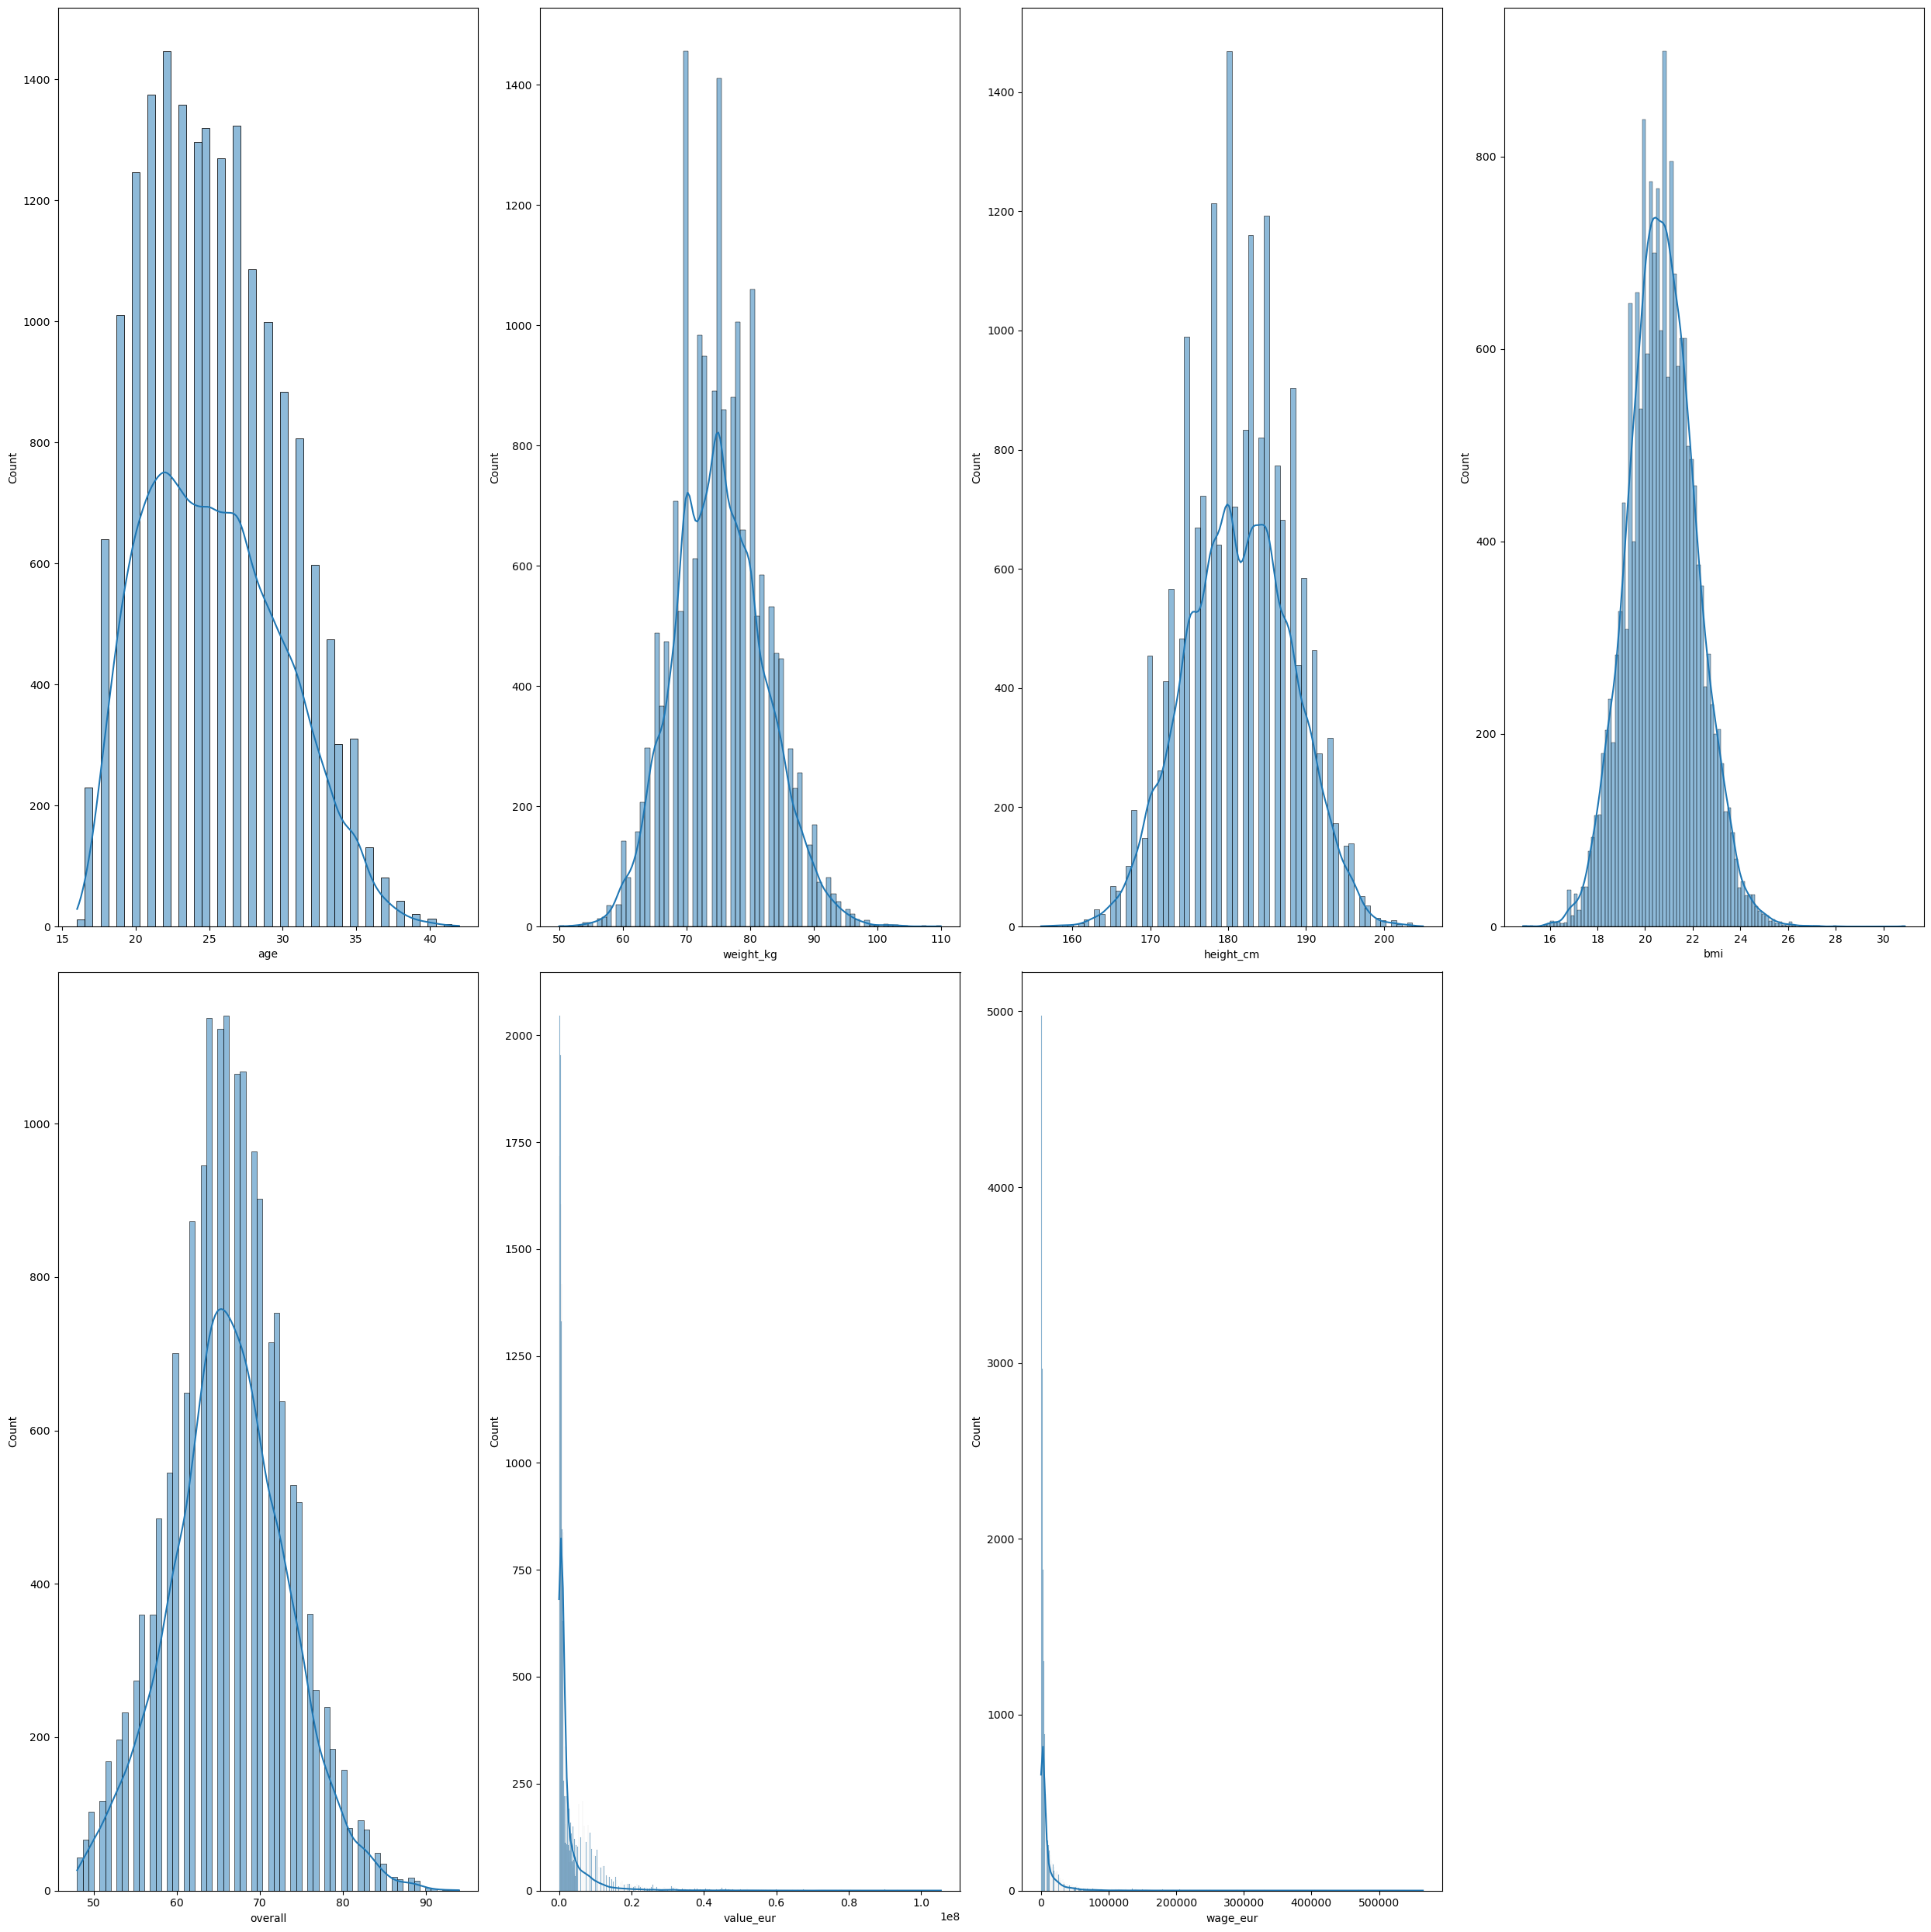

In [8]:
# Numerical columns for first general analysis
analysis1 = fifa20[['age', 'weight_kg', 'height_cm', 'bmi', 'overall', 'value_eur', 'wage_eur']]

plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for i in analysis1.columns:
    plt.subplot(2,4,plotnum)
    sns.histplot(x=fifa20[i],kde=True)
    plotnum+=1
plt.tight_layout()  

In [9]:
# Check skewness
# The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew
skew_ori = analysis1.skew()
skew_ori

age          0.380620
weight_kg    0.220802
height_cm   -0.038197
bmi          0.150443
overall      0.070893
value_eur    6.425941
wage_eur     7.821096
dtype: float64

##  Which foot is preferred?

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

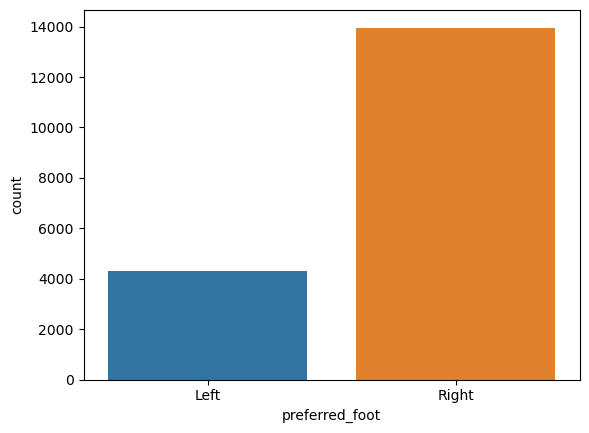

In [10]:
# 2nd analysis
sns.countplot(data=fifa20, x='preferred_foot')

## Insights from univariate analysis :
1. Features Age, Weight, and BMI are fairly right skewed, while for Overall is almost normal distribution. For Value and Wage mostly skewed. While for Height is fairly left skewed.
2. Age ranging from 15 to 42 years old, while mostly players are 23 years old.
3. Most of the players are in between 70 and 80 kg of weight, 175 and 190 cm of height.
4. Most players prefer using right foot than left one.

## 4.3 Multivariate Analysis

### 4.3.1 Top 10 Clubs

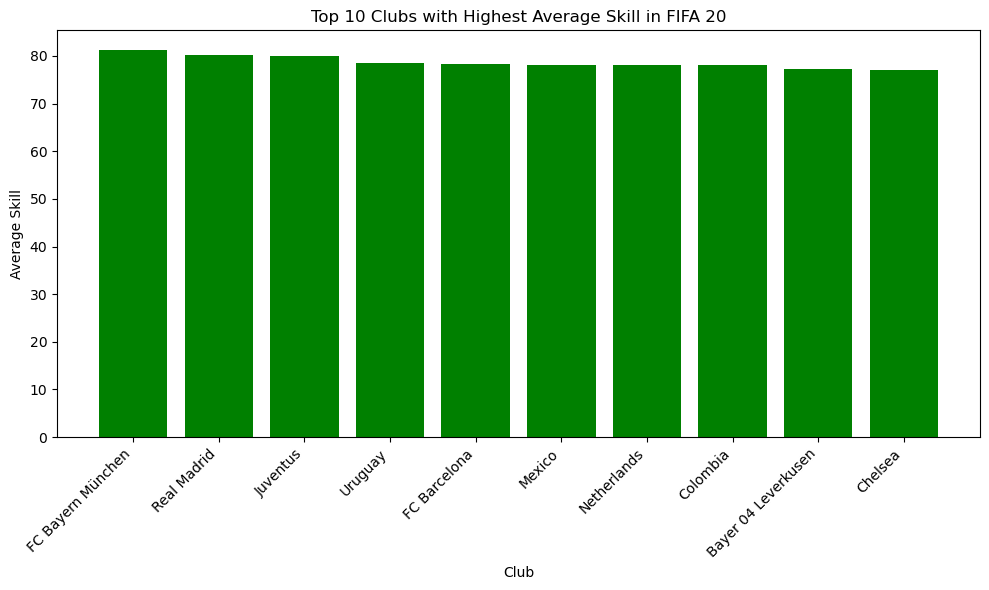

In [11]:
# Group data by club and calculate the average overall skill
club_avg_skill = fifa20.groupby('club')['overall'].mean().reset_index()

# Sort the clubs by average overall skill in descending order and select top 10
top_10_clubs = club_avg_skill.sort_values(by='overall', ascending=False).head(10)

# bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_clubs['club'], top_10_clubs['overall'], color='green')
plt.xlabel('Club')
plt.ylabel('Average Skill')
plt.title('Top 10 Clubs with Highest Average Skill in FIFA 20')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 4.3.2 Top Countries players's value

In [12]:
# Players total value based on nationality
value_national=fifa20.groupby('nationality').agg(sum_value_eur=("value_eur", 'sum')) 
value_national = value_national.reset_index()
top10value_national=value_national.sort_values(by='sum_value_eur', ascending=False).head(10)
top10value_national

,nationality,sum_value_eur
136,Spain,4735490000
18,Brazil,3728055000
53,France,3696205000
57,Germany,3103520000
5,Argentina,3026500000
45,England,2695050000
77,Italy,2154825000
121,Portugal,1682470000
108,Netherlands,1430265000
12,Belgium,1236365000


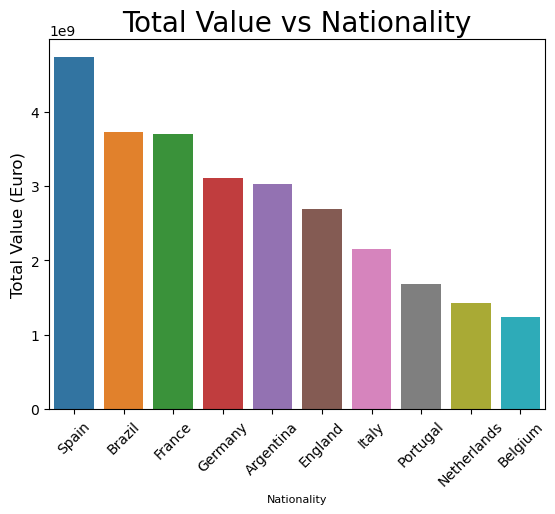

In [13]:
# Top 10 countries highest total value 
sns.barplot(x='nationality', y='sum_value_eur', data=top10value_national)
plt.xticks(rotation=45)
plt.xlabel('Nationality', fontsize=8);
plt.ylabel('Total Value (Euro)', fontsize=12);
plt.title('Total Value vs Nationality', fontsize=20)
plt.show()

### 4.3.3 Top Club Total Players Values

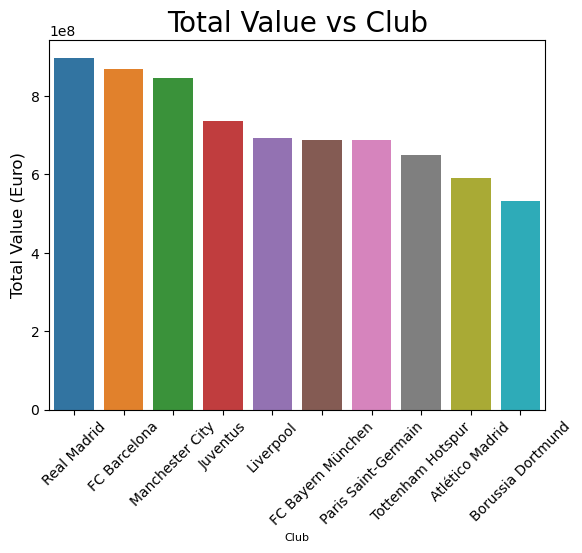

In [14]:
# Top 10 Club having highest accumulative player value
value_club=fifa20.groupby('club').agg(sum_value_eur=("value_eur", 'sum')) 
value_club = value_club.reset_index()
top10value_club=value_club.sort_values(by='sum_value_eur', ascending=False).head(10)
sns.barplot(x='club', y='sum_value_eur', data=top10value_club)
plt.xticks(rotation=45)
plt.xlabel('Club', fontsize=8);
plt.ylabel('Total Value (Euro)', fontsize=12);
plt.title('Total Value vs Club', fontsize=20)
plt.show()

## Insights from bivariate analysis :
1. Based on overall players skill, best 3 clubs are Bayern Muenchen, Real Madrid and Juventus.
2. Top 3 countries having highest total value players are Spain, Brazil and France.
3. Top 3 clubs having highest total value players are Real Madrid, Barcelona and Manchester City.

## TASK 1 : Top 10 countries with most players

In [15]:
# Count the number of players from each country
players_per_country = fifa20['nationality'].value_counts()

# Get the top 10 countries with the most players
top_10_countries = players_per_country.head(10)

# Display the rank-ordered list of top 10 countries with most players
print("Rank-ordered list of top 10 countries with most players in FIFA 20:")
print(top_10_countries)

Rank-ordered list of top 10 countries with most players in FIFA 20:
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64


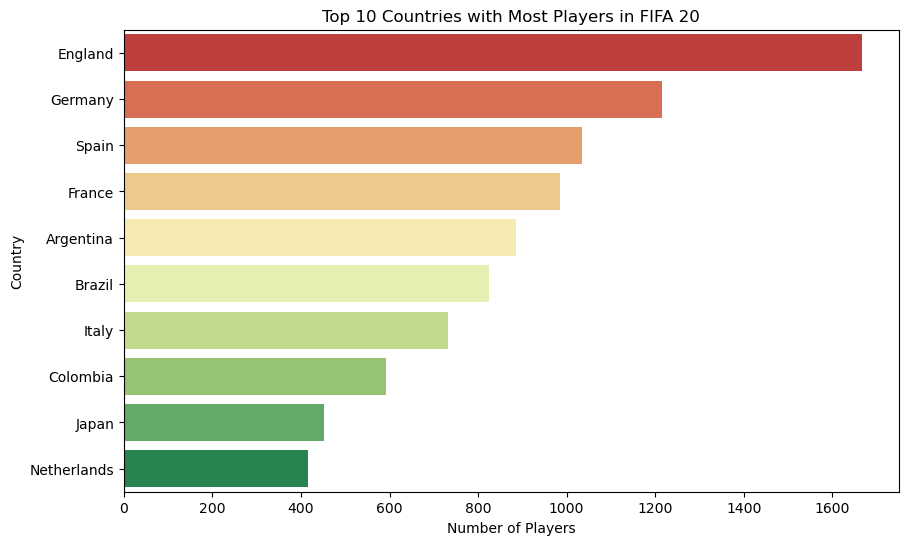

In [16]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='RdYlGn')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Players in FIFA 20')
plt.show()

### Conclusion: The top 3 countries having most players are England, Germany and Spain respectively.

## TASK 2 : Plot the distribution of overall rating vs. age of players & Interpret it

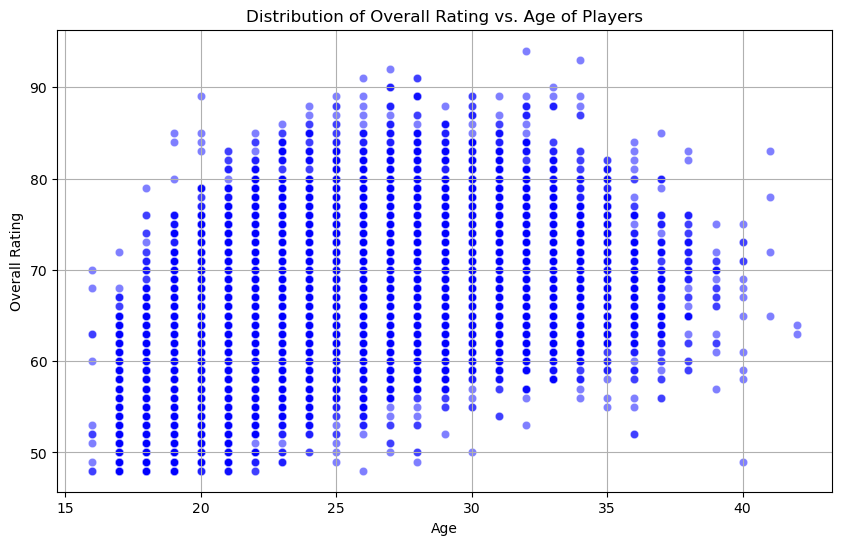

In [17]:
# Plotting the distribution of overall rating vs. age 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='overall', data=fifa20, alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Distribution of Overall Rating vs. Age of Players')
plt.grid(True)
plt.show()


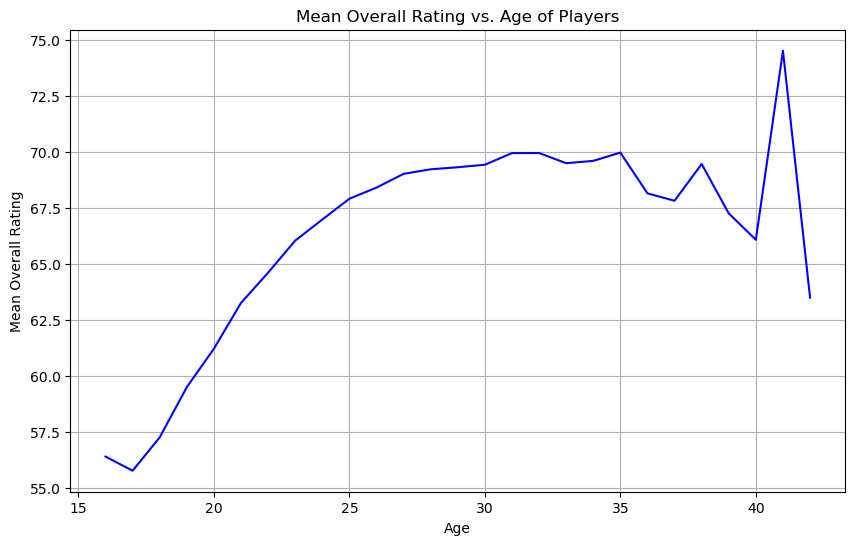

In [18]:
# Grouping by age and calculating the mean overall rating
mean_overall_by_age = fifa20.groupby('age')['overall'].mean().reset_index()

# Plotting the distribution of mean overall rating vs. age 
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='overall', data=mean_overall_by_age, color='blue')
plt.xlabel('Age')
plt.ylabel('Mean Overall Rating')
plt.title('Mean Overall Rating vs. Age of Players')
plt.grid(True)
plt.show()


### From the line plot we can say that age 42 is the peak performance of players. However, while looking on the scatter plot, the amount of players at age 42 are little, so it is not represent the whole data. 
### Conclusion: The age's peak performance players are on their 32 age and then degrade by age..

## TASK 3 : Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

In [19]:
# Filter for offensive positions: Striker, Right Winger, Left Winger
offensive_positions = ['ST', 'RW', 'LW']
offensive_players = fifa20[fifa20['team_position'].isin(offensive_positions)]

# Calculate mean values for each offensive position
mean_values_by_position = offensive_players.groupby('team_position')['value_eur'].mean().reset_index()
sorted_mean_values = mean_values_by_position.sort_values(by='value_eur', ascending=False)
# Display the mean values for each offensive position
print("Sorted mean values for each offensive position:")
print(sorted_mean_values)

Sorted mean values for each offensive position:
  team_position     value_eur
1            RW  7.080248e+06
0            LW  6.721358e+06
2            ST  4.784410e+06


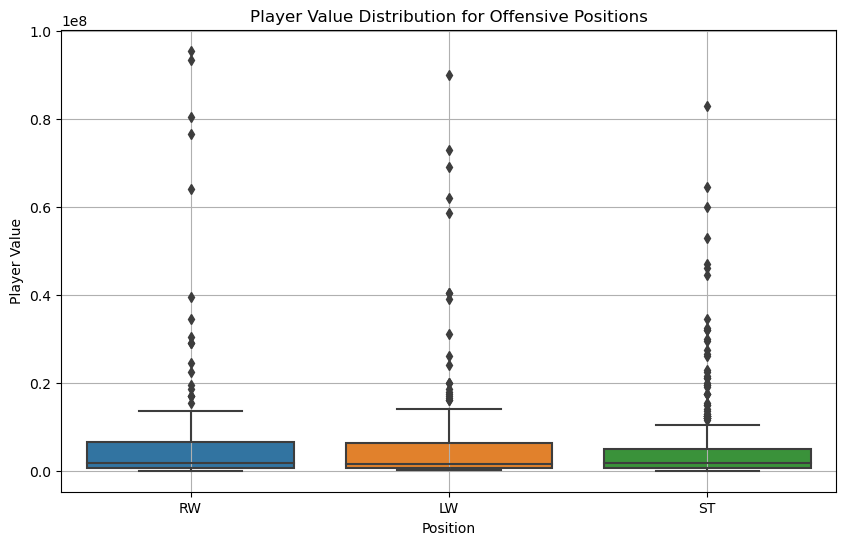

In [20]:
# Plotting salaries of offensive players by position
plt.figure(figsize=(10, 6))
sns.boxplot(x='team_position', y='value_eur', data=offensive_players)
plt.xlabel('Position')
plt.ylabel('Player Value')
plt.title('Player Value Distribution for Offensive Positions')
plt.grid(True)
plt.show()

### Conclusion: Right Wing position has the highest value, followed by Left Wing and Striker

## Other Analysis :

## a. Radar Chart

In [21]:
# Compare Ronaldo and Messi
column=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = fifa20.head(2)[column]
rival= rival.set_index('short_name')
rival.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,94,94,87.0,92.0,92.0,96.0,39.0,66.0
Cristiano Ronaldo,93,93,90.0,93.0,82.0,89.0,35.0,78.0


In [22]:
values = rival.iloc[0].tolist()
values += values [:1]
values

[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0]

In [23]:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0]

In [24]:
from math import pi #Used in Radar Plots

def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

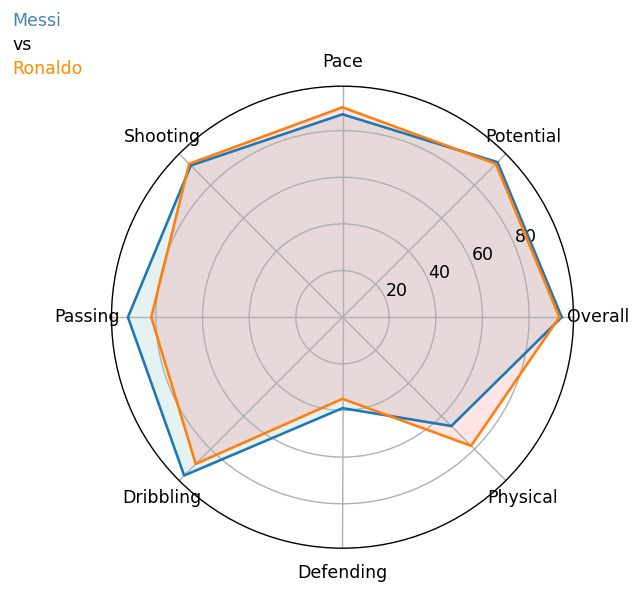

In [25]:
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

### Conclusion: Out of 8 attributes, Messi performed well in 5 and Ronaldo in 3


## b. Word Cloud

In [26]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 4.5 MB/s eta 0:00:00


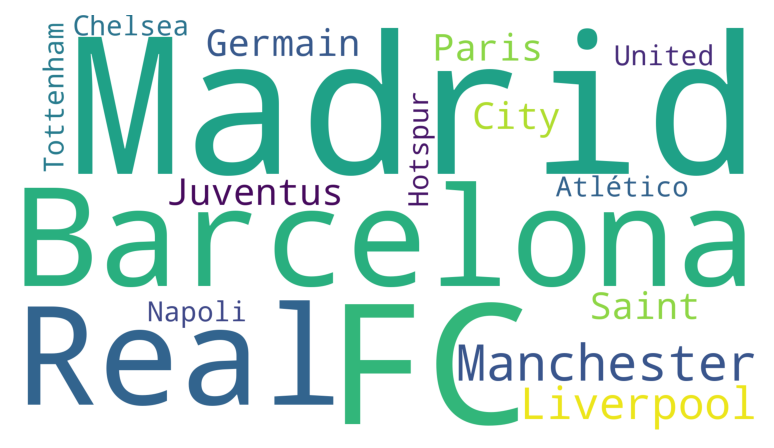

In [27]:
from wordcloud import WordCloud

plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa20.head(20)['club']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Step 5 : Data Preprocessing as required

## 5.1 Remove unwanted columns

In [28]:
useless_columns1 = ['sofifa_id', 'player_url', 'long_name', 'dob', 'body_type', 'real_face', 'player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number', 'player_traits']
fifa20 = fifa20.drop(useless_columns1, axis=1)
fifa20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,bmi
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,21.176471
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,22.192513
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,19.428571
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.138298
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,21.142857


In [29]:
# continue remove unwanted columns
unwanted_columns2 = ['short_name', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'international_reputation', 'release_clause_eur', 'team_position', 'team_jersey_number', 'joined', 'contract_valid_until', 'bmi']  
indoubt_columns = ['age', 'height_cm', 'weight_kg'] # don't know whether it is should be drop or not as they are not correlated with skills
fifa20 = fifa20.drop(unwanted_columns2, axis=1)
fifa20 = fifa20.drop(indoubt_columns, axis=1)
fifa20.head()

,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,Left,4,4,Medium/Low,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Right,4,5,High/Low,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Right,5,5,High/Medium,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,Right,3,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Right,4,4,High/Medium,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## 5.2 Remove columns with high missing value

In [30]:
# Missing values in each column
fifa20.isnull().sum()/(len(fifa20))*100

preferred_foot                 0.000000
weak_foot                      0.000000
skill_moves                    0.000000
work_rate                      0.000000
pace                          11.139074
shooting                      11.139074
passing                       11.139074
dribbling                     11.139074
defending                     11.139074
physic                        11.139074
gk_diving                     88.860926
gk_handling                   88.860926
gk_kicking                    88.860926
gk_reflexes                   88.860926
gk_speed                      88.860926
gk_positioning                88.860926
attacking_crossing             0.000000
attacking_finishing            0.000000
attacking_heading_accuracy     0.000000
attacking_short_passing        0.000000
attacking_volleys              0.000000
skill_dribbling                0.000000
skill_curve                    0.000000
skill_fk_accuracy              0.000000
skill_long_passing             0.000000


In [31]:
# remove columns who have missing value 88%
high_miss_value = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
fifa20 = fifa20.drop(high_miss_value, axis=1)
fifa20.head(3)

,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,Left,4,4,Medium/Low,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Right,4,5,High/Low,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Right,5,5,High/Medium,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [32]:
# splitting columns who have two numbers on value
two_numbers = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

# split and take the first index
for col in two_numbers:
    fifa20[col]=fifa20[col].str.split('+', expand = True)[0]
fifa20[two_numbers].head(3)

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61


## 5.4 Impute missing values

In [33]:
# Columns on two_numberl list are object datatype, so they should be convert to float before imputing
for i in two_numbers :
    fifa20[i] = fifa20[i].astype(float)
    
# check dtype after changing to float
fifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   preferred_foot              18278 non-null  object 
 1   weak_foot                   18278 non-null  int64  
 2   skill_moves                 18278 non-null  int64  
 3   work_rate                   18278 non-null  object 
 4   pace                        16242 non-null  float64
 5   shooting                    16242 non-null  float64
 6   passing                     16242 non-null  float64
 7   dribbling                   16242 non-null  float64
 8   defending                   16242 non-null  float64
 9   physic                      16242 non-null  float64
 10  attacking_crossing          18278 non-null  int64  
 11  attacking_finishing         18278 non-null  int64  
 12  attacking_heading_accuracy  18278 non-null  int64  
 13  attacking_short_passing     182

In [34]:
# define columns to be imputed
impute_col_value = ['pace', 'shooting', 'passing', 'dribbling','defending', 'physic', 'ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

# impute value with data mean (because it is a numerical data)
for x in impute_col_value :
    fifa20[x]=fifa20[x].fillna(fifa20[x].median())

## 5.4 Convert categorical columns to numerical columns

In [35]:
# 'preferred_foot' columns
# it is a nominal type categorical data
foot_dummies = pd.get_dummies(fifa20.preferred_foot, drop_first=True)
foot_dummies.head()

,Right
0,0
1,1
2,1
3,1
4,1


In [36]:
# merge the data
fifa20= pd.concat([fifa20, foot_dummies], axis='columns')
fifa20.head(2)

,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Right
0,Left,4,4,Medium/Low,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0
1,Right,4,5,High/Low,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1


In [37]:
#drop the original columns ('preferred_foot')
fifa20 = fifa20.drop('preferred_foot', axis=1)
fifa20.head(2)

,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Right
0,4,4,Medium/Low,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0
1,4,5,High/Low,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1


In [38]:
# split 'work_rate' columns
work_rate_split = fifa20['work_rate'].str.split('/', expand=True)
work_rate_split.head(2)

,0,1
0,Medium,Low
1,High,Low


In [39]:
# rename columns
work_rate_split.rename(columns={0 :"AttackWorkRate", 1:"DefenseWorkRate"},inplace=True) 
work_rate_split.head(3)

,AttackWorkRate,DefenseWorkRate
0,Medium,Low
1,High,Low
2,High,Medium


In [40]:
# mapping columns
# it is an ordinal type categorical data
# based on task, replace Low with 0, Medium with 0.5, High with 1
mappings = {'Low': 0, 'Medium': 0.5, 'High':1}
work_rate_split['AttackWorkRate'] = work_rate_split['AttackWorkRate'].map(mappings)
work_rate_split['DefenseWorkRate'] = work_rate_split['DefenseWorkRate'].map(mappings)
work_rate_split.head(3)

,AttackWorkRate,DefenseWorkRate
0,0.5,0.0
1,1.0,0.0
2,1.0,0.5


In [41]:
# merged with work_rate_split
fifa20 = pd.concat([fifa20, work_rate_split], axis=1)
fifa20.head(2)

,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Right,AttackWorkRate,DefenseWorkRate
0,4,4,Medium/Low,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0,0.5,0.0
1,4,5,High/Low,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1,1.0,0.0


In [42]:
#drop the original columns ('work_rate')
fifa20 = fifa20.drop('work_rate', axis=1)
fifa20.head(2)

,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Right,AttackWorkRate,DefenseWorkRate
0,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0,0.5,0.0
1,4,5,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1,1.0,0.0


In [43]:
# Check file
fifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   weak_foot                   18278 non-null  int64  
 1   skill_moves                 18278 non-null  int64  
 2   pace                        18278 non-null  float64
 3   shooting                    18278 non-null  float64
 4   passing                     18278 non-null  float64
 5   dribbling                   18278 non-null  float64
 6   defending                   18278 non-null  float64
 7   physic                      18278 non-null  float64
 8   attacking_crossing          18278 non-null  int64  
 9   attacking_finishing         18278 non-null  int64  
 10  attacking_heading_accuracy  18278 non-null  int64  
 11  attacking_short_passing     18278 non-null  int64  
 12  attacking_volleys           18278 non-null  int64  
 13  skill_dribbling             182

In [44]:
# make a copy for other algorithm before the data scaled and outliers handled
fifa20_raw = fifa20.copy()

In [45]:
# Transforming the data with square root
# I also did tranforming data with log(10) and the result is the same
import math 
for i in fifa20.columns:
    fifa20[i]=fifa20[i].pow(0.5)

In [46]:
fifa20.head(2)

,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Right,AttackWorkRate,DefenseWorkRate
0,2.0,2.000000,9.327379,9.591663,9.591663,9.797959,6.244998,8.124038,9.380832,9.746794,8.366600,9.591663,9.380832,9.848858,9.643651,9.695360,9.591663,9.797959,9.539392,9.165151,9.643651,9.746794,9.746794,9.273618,8.246211,8.660254,8.246211,9.695360,6.928203,6.324555,9.695360,9.695360,8.660254,9.797959,5.744563,6.082763,5.099020,2.449490,3.316625,3.872983,3.741657,2.828427,9.433981,9.433981,9.433981,9.643651,9.643651,9.643651,9.643651,9.643651,9.643651,9.643651,9.643651,9.591663,9.327379,9.327379,9.327379,9.591663,8.246211,8.124038,8.124038,8.124038,8.246211,7.937254,7.211103,7.211103,7.211103,7.937254,0.0,0.707107,0.0
1,2.0,2.236068,9.486833,9.643651,9.055385,9.433981,5.916080,8.831761,9.165151,9.695360,9.433981,9.110434,9.327379,9.433981,9.000000,8.717798,8.774964,9.591663,9.433981,9.539392,9.327379,9.797959,8.426150,9.746794,9.746794,9.219544,8.831761,9.643651,7.937254,5.385165,9.746794,9.055385,9.219544,9.746794,5.291503,5.656854,4.898979,2.645751,3.316625,3.872983,3.741657,3.316625,9.539392,9.539392,9.539392,9.433981,9.486833,9.486833,9.486833,9.433981,9.380832,9.380832,9.380832,9.380832,9.000000,9.000000,9.000000,9.380832,8.062258,7.810250,7.810250,7.810250,8.062258,7.810250,7.280110,7.280110,7.280110,7.810250,1.0,1.000000,0.0


## 5.5 Handling Outliers

In [47]:
# define function to check outliers. drop it if less than 2%, else replace it with median 
def handle_outliers(df):
    # Create a copy of the DataFrame to avoid the SettingWithCopyWarning
    df_processed = df.copy()
    
    # Iterate through each column 
    for column in df.columns:
        data = df[column]
        
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Define the boundaries for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers in the column
        outliers = (data < lower_bound) | (data > upper_bound)
        
        # Calculate the percentage of outliers
        outlier_percentage = outliers.sum() / len(df) * 100
        
        # If outlier percentage is less than 2%, drop outliers; otherwise, replace with median
        if outlier_percentage < 2: 
            df_processed = df_processed.loc[~outliers] 
        else: 
            median = np.median(data) 
            df_processed.loc[outliers, column] = median 
    return df_processed

# Handle outliers
replace_data = handle_outliers(fifa20)
fifa20 = replace_data.copy()

In [48]:
fifa20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16685 entries, 3 to 18277
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   weak_foot                   16685 non-null  float64
 1   skill_moves                 16685 non-null  float64
 2   pace                        16685 non-null  float64
 3   shooting                    16685 non-null  float64
 4   passing                     16685 non-null  float64
 5   dribbling                   16685 non-null  float64
 6   defending                   16685 non-null  float64
 7   physic                      16685 non-null  float64
 8   attacking_crossing          16685 non-null  float64
 9   attacking_finishing         16685 non-null  float64
 10  attacking_heading_accuracy  16685 non-null  float64
 11  attacking_short_passing     16685 non-null  float64
 12  attacking_volleys           16685 non-null  float64
 13  skill_dribbling             166

## 5.6 Data Scaling

### 5.6.1 Scaling with StandardScaler

In [49]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_standard=scaler.fit_transform(fifa20)

In [50]:
df_standard

array([[-4.44089210e-16, -2.24063554e+00, -1.98013723e-02, ...,
         0.00000000e+00, -6.27893985e-01, -2.22044605e-16],
       [-4.44089210e-16, -2.24063554e+00, -1.98013723e-02, ...,
         0.00000000e+00, -6.27893985e-01, -2.22044605e-16],
       [-4.44089210e-16, -5.22030006e-01,  8.89188239e-01, ...,
         0.00000000e+00, -6.27893985e-01, -2.22044605e-16],
       ...,
       [-4.44089210e-16, -5.22030006e-01, -1.87945810e+00, ...,
         0.00000000e+00, -6.27893985e-01, -2.22044605e-16],
       [-4.44089210e-16, -5.22030006e-01, -1.23377514e+00, ...,
         0.00000000e+00, -6.27893985e-01, -2.22044605e-16],
       [-4.44089210e-16, -5.22030006e-01, -1.10796590e+00, ...,
         0.00000000e+00, -6.27893985e-01, -2.22044605e-16]])

### 5.6.2 Scaling with RobustScale

#### Scaling with RobustScale() doesn't require the outliers to be handled.

In [51]:
# import module
from sklearn.preprocessing import RobustScaler

# Scaling
trans = RobustScaler()
fifa20_robust_scale = trans.fit_transform(fifa20_raw)

In [52]:
## creating new dataframe
df_robust=pd.DataFrame(data=fifa20_robust_scale, columns= fifa20_raw.columns)

# Step 6: Feature Selection

In [53]:
#correlations = fifa20merged2.corr(method='pearson')
#correlations

In [54]:
"""
# color bar range between 0 and 0.5
sns.heatmap(fifa20merged2.corr(), vmin=0, vmax=0.8)
plt.show()

# color bar range between 0.7 and 1
sns.heatmap(fifa20merged2.corr(), cmap="RdYlGn", vmin=0.8, vmax=1)
plt.show()
"""

'\n# color bar range between 0 and 0.5\nsns.heatmap(fifa20merged2.corr(), vmin=0, vmax=0.8)\nplt.show()\n\n# color bar range between 0.7 and 1\nsns.heatmap(fifa20merged2.corr(), cmap="RdYlGn", vmin=0.8, vmax=1)\nplt.show()\n'

### We will not use heatmap feature correlation because it is very complicated for many features (around 70 features).
### Instead, we will use PCA for a dimensionality reduction method of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

## 6.1 PCA for Standard Scaler

In [55]:
## getting the optimal number of PCA
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(df_standard)

In [56]:
principalComponents

array([[-2.75738440e+00,  6.10525450e-01,  6.50376585e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  4.42172747e-14],
       [-2.67373502e+00, -5.53877674e-02,  7.22816322e+00, ...,
         5.22436076e-16,  6.43007042e-16, -2.23231352e-16],
       [ 7.69535950e+00, -9.04862474e+00,  1.40383129e+00, ...,
        -3.13160124e-16,  2.62813166e-16, -3.34357884e-17],
       ...,
       [-1.07538191e+01,  1.35629510e+00, -2.25732152e+00, ...,
         1.78461885e-18,  5.34812692e-18, -7.22192946e-18],
       [-9.87745998e+00,  1.49768960e+00, -2.13236266e+00, ...,
        -1.55234584e-16,  1.94552516e-17, -2.98196483e-17],
       [-1.01419080e+01,  1.02406971e+00, -2.47184559e+00, ...,
        -4.07578094e-17, -3.56660077e-17, -4.21983837e-18]])

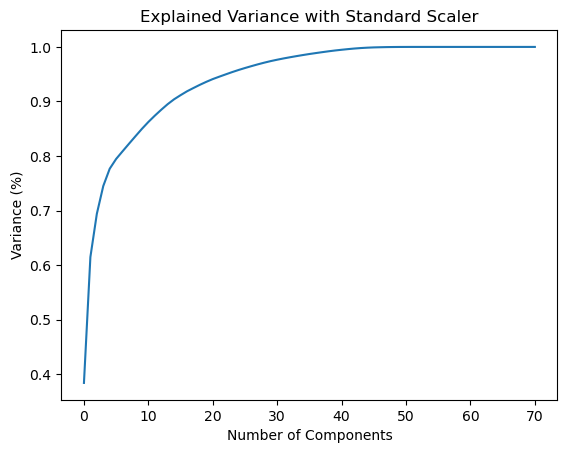

In [57]:
# Scree Plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#cumulative sum of PC
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance with Standard Scaler')
plt.show()

In [58]:
pca.explained_variance_ratio_

array([3.84049905e-01, 2.30731344e-01, 7.92387574e-02, 5.10190746e-02,
       3.16782940e-02, 1.79789633e-02, 1.40360995e-02, 1.38894987e-02,
       1.37039230e-02, 1.34926714e-02, 1.25956089e-02, 1.15526912e-02,
       1.08770530e-02, 1.02488090e-02, 8.95993322e-03, 7.50583681e-03,
       7.09558137e-03, 6.04052145e-03, 5.87508171e-03, 5.47142539e-03,
       5.01613354e-03, 4.36156940e-03, 4.22936680e-03, 4.16377697e-03,
       3.90045815e-03, 3.62507139e-03, 3.43202435e-03, 3.31632563e-03,
       3.08808926e-03, 2.86056146e-03, 2.52781778e-03, 2.34926366e-03,
       2.17182740e-03, 2.06540500e-03, 1.97840657e-03, 1.87568565e-03,
       1.72934918e-03, 1.67611503e-03, 1.61047437e-03, 1.47451855e-03,
       1.29652610e-03, 1.19429561e-03, 1.09155220e-03, 8.77059449e-04,
       6.69519926e-04, 4.93490557e-04, 3.05028204e-04, 2.61891802e-04,
       1.43114309e-04, 1.03634552e-04, 3.95493700e-05, 3.10245730e-05,
       2.43460081e-33, 1.75104094e-33, 1.75104094e-33, 1.75104094e-33,
      

### From the diagram above, it can be seen that 20 principal components explain almost 93% of the variance in data while 30 principal components explain around 96% of the variance in data.
### So, instead of giving all the columns as input, we’d only feed these 20 principal components of the data to the machine learning algorithm and we will obtain a similar result.

In [59]:
# new pca dataframe with standard scaler
pca = PCA(n_components=20)
new_data = pca.fit_transform(df_standard)
new_columns = ['pca_1', 'pca_2', 'pca_3','pca_4', 'pca_5', 'pca_6','pca_7', 'pca_8', 'pca_9','pca_10', 
               'pca_11', 'pca_12','pca_13', 'pca_14', 'pca_15','pca_16', 'pca_17', 'pca_18','pca_19', 'pca_20']

# This will be the new data fed to the algorithm.
df_standard = pd.DataFrame(data = new_data, columns = new_columns)
df_standard.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
0,-2.757384,0.610525,6.503766,0.782669,-0.885900,0.110833,-0.328458,0.087400,-0.044474,-0.044667,-2.031829,-0.196090,-0.924244,1.293294,0.785453,0.193675,1.608855,0.699501,0.841602,2.073144
1,-2.673735,-0.055388,7.228162,1.454931,0.726011,0.211456,-0.310906,0.093889,-0.054431,-0.046082,-1.738245,-0.362568,-1.042793,1.499028,1.988805,1.368282,0.681945,0.713663,0.289783,2.628045
2,7.695359,-9.048625,1.403831,2.212910,-1.836879,-0.262848,0.197081,0.107184,0.472991,-0.724028,-1.209780,-0.262360,0.905968,1.526443,0.204445,1.188323,0.258258,-1.068328,0.447201,0.108136
3,-0.330465,-9.729660,2.446257,0.923335,-2.594822,2.356397,-1.134711,1.942054,-0.841850,0.734588,-0.763214,0.206821,0.960098,1.404053,2.286554,-0.313576,-0.405915,0.005597,-0.424083,0.589496
4,-2.820873,0.589934,7.135878,0.735249,-0.113395,0.097609,0.134356,-0.047539,-0.151463,-0.050196,0.851792,-0.374444,0.406837,0.659857,1.145030,-0.882393,1.354866,-0.137771,1.317355,2.672670


## 6.2 PCA with Robust Scaler

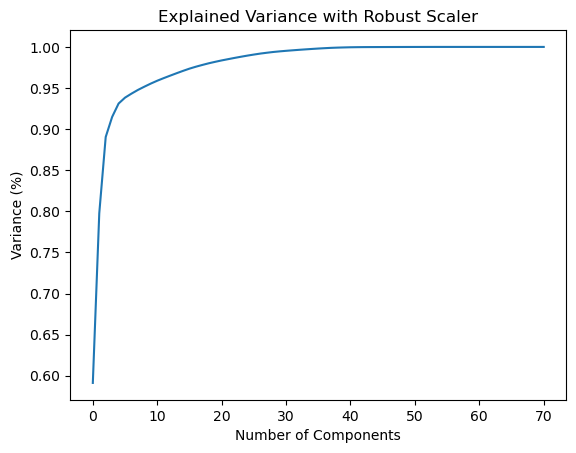

In [60]:
## getting the optimal number of PCA
pca = PCA()
principalComponents = pca.fit_transform(df_robust)

# Scree Plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#cumulative sum of PC
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance with Robust Scaler')
plt.show()

### For Robust Scaling, it gives 10 components with explained variance 95% 

In [61]:
# new pca dataframe with robust scaler
pca = PCA(n_components=10)
new_data = pca.fit_transform(df_robust)
new_columns = ['pca_1', 'pca_2', 'pca_3','pca_4', 'pca_5', 'pca_6','pca_7', 'pca_8', 'pca_9','pca_10']

# This will be the new data fed to the algorithm.
df_robust = pd.DataFrame(data = new_data, columns = new_columns)
df_robust.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,-5.481080,14.799941,1.657179,0.484942,0.188151,0.721761,0.339067,0.260373,0.757379,-0.322115
1,-5.046306,13.228625,1.706115,2.124442,-2.660551,0.781096,-0.010242,-0.159725,0.887269,0.145533
2,-4.959231,13.350887,2.895446,-0.501981,0.163125,1.019291,1.511371,-0.504973,0.895087,0.113590
3,26.233365,4.154292,-0.699176,0.219268,-2.221999,4.132025,2.303303,1.646295,0.226108,-1.057962
4,-5.747490,12.796334,2.173820,-0.314583,-0.116817,0.180444,0.915135,0.193246,0.724765,-0.701363


# Step 7 : Model Selection

## 7.1.a K-Means Algorithm with Standard Scaler

## Finding the best k by elbow method

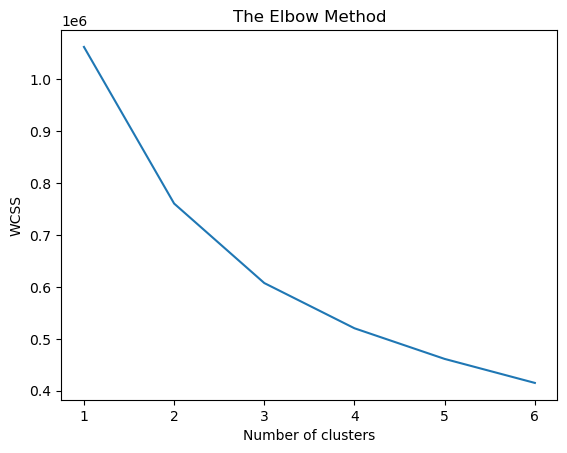

In [62]:
from sklearn.cluster import KMeans
#elbow method

wcss=[] # Within Cluster Sum of Squared error
for i in range (1,7):
    # calculate wcss
    model=KMeans(n_clusters=i, random_state=36, n_init=100)
    #model=KMeans(n_clusters=i,init='k-means++', random_state=36, n_init=100)
    model.fit(df_standard)
    wcss.append(model.inertia_)

plt.plot(range(1,7),wcss)
plt.xticks(np.arange(1, 7, 1))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
# calculate silhouette score
from sklearn.metrics import silhouette_score

for i in range (2, 7):
    model=KMeans(n_clusters=i,random_state=36, n_init=200)
    #model=KMeans(n_clusters=i,init='k-means++', random_state=36, n_init=200)
    model.fit(df_standard)
    label=model.labels_
    score=silhouette_score(df_standard,label)
    print ("Silhoutte Score for {} cluster is {}".format(i,score))

Silhoutte Score for 2 cluster is 0.24344630259164973
Silhoutte Score for 3 cluster is 0.24584669105172832
Silhoutte Score for 4 cluster is 0.2789699235542686
Silhoutte Score for 5 cluster is 0.2436667140266566
Silhoutte Score for 6 cluster is 0.23348424687128855


## For model with input data scaled by Standard Scaler, best model is with k=4 and it gives Silhouette Score 0.27 

## 7.1.b K-Means Algorithm with Robust Scaler

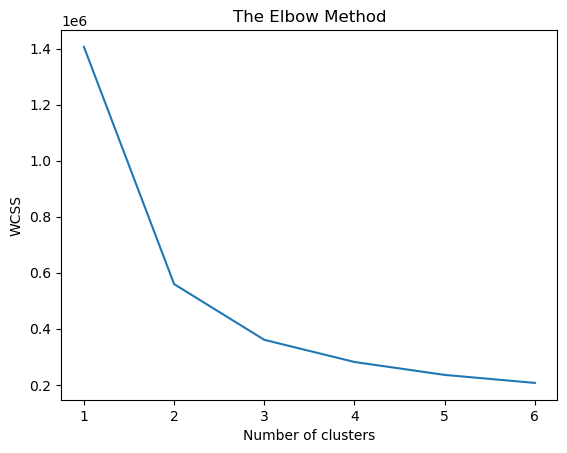

In [64]:
#elbow method

wcss=[] # Within Cluster Sum of Squared error
for i in range (1,7):
    # calculate wcss
    model=KMeans(n_clusters=i, random_state=36, n_init=100)
    #model=KMeans(n_clusters=i,init='k-means++', random_state=36, n_init=100)
    model.fit(df_robust)
    wcss.append(model.inertia_)

plt.plot(range(1,7),wcss)
plt.xticks(np.arange(1, 7, 1))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
# calculate silhouette score
from sklearn.metrics import silhouette_score

for i in range (2, 7):
    model=KMeans(n_clusters=i,random_state=36, n_init=200)
    #model=KMeans(n_clusters=i,init='k-means++', random_state=36, n_init=200)
    model.fit(df_robust)
    label=model.labels_
    score=silhouette_score(df_robust,label)
    print ("Silhoutte Score for {} cluster is {}".format(i,score))

Silhoutte Score for 2 cluster is 0.6837955856837604
Silhoutte Score for 3 cluster is 0.3633772065025226
Silhoutte Score for 4 cluster is 0.35101228681764496
Silhoutte Score for 5 cluster is 0.3290535685576915
Silhoutte Score for 6 cluster is 0.32523878095486863


## For model with input data scaled by Robust Scaler, best model with k=2 and it gives Silhouette Score 0.68

## 7.1.c K-Means Algorithm with Quantile Transformer scaling

In [66]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer

# Sample DataFrame with outliers
data = fifa20_raw

# Scaling with different techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'QuantileTransformer_uniform': QuantileTransformer(output_distribution='uniform', n_quantiles=90)
}

# Try different numbers of clusters
n_clusters_list = [2, 3, 4, 5, 6, 7]

results = {}
for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    results[scaler_name] = {}
    
    for n_clusters in n_clusters_list:
        kmeans = KMeans(n_clusters=n_clusters, random_state=36, n_init=200)
        #kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=36, n_init=200)
        cluster_labels = kmeans.fit_predict(scaled_data)
        silhouette = silhouette_score(scaled_data, cluster_labels)
        results[scaler_name][f'n_clusters_{n_clusters}'] = silhouette

# Display silhouette scores for different scaling techniques and cluster numbers
for scaler_name, clusters in results.items():
    print(f"--- {scaler_name} ---")
    for cluster, silhouette_score in clusters.items():
        print(f"{cluster}: {silhouette_score}")
    print()


--- StandardScaler ---
n_clusters_2: 0.252101256796908
n_clusters_3: 0.2973567578518953
n_clusters_4: 0.3127138228474359
n_clusters_5: 0.27731243337459394
n_clusters_6: 0.2677366551263366
n_clusters_7: 0.23703355504939186

--- RobustScaler ---
n_clusters_2: 0.660688639482866
n_clusters_3: 0.3300852844350674
n_clusters_4: 0.31098336881730826
n_clusters_5: 0.28634645740698306
n_clusters_6: 0.2795125233058372
n_clusters_7: 0.2509360536913047

--- QuantileTransformer_uniform ---
n_clusters_2: 0.270126601404937
n_clusters_3: 0.23950085044599123
n_clusters_4: 0.2793090349578923
n_clusters_5: 0.2670152571164102
n_clusters_6: 0.24689514042995508
n_clusters_7: 0.22102582686485128



### Here, pipelines were made to prevent data leakage. For model with standard scaler, the silhoutte score increase from 0.27 to 0.31. For model with Robustscaler it is slightly decrease (0.68 to 0.66). For model with QuantileTransformer_uniform, the silhouette score is 0.27

## 7.2 DBSCAN Algorithm

    DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm. 
    Unlike centroid-based algorithms like KMeans or hierarchical clustering, DBSCAN doesn't require specifying the number of clusters beforehand and can find arbitrarily shaped clusters.
    Key Concepts in DBSCAN:
    Density-Based: DBSCAN identifies clusters based on the density of points in the dataset. It defines clusters as continuous regions of high-density separated by regions of low-density.
    Core Points: A core point is a data point within the dataset for which a specified number of neighboring points (within a defined radius) fall within its vicinity. These points are in the interior of a cluster.
    Border Points: Border points are within the neighborhood of a core point but do not have enough neighbors to be considered a core point themselves. They are on the edges of clusters.
    Noise Points: Points that are neither core nor border points are considered noise points or outliers. They do not belong to any cluster.
    How DBSCAN Works:
    Parameter Settings: DBSCAN requires two parameters:
    Epsilon (eps): The radius around a point to define its neighborhood.
    Minimum Points (min_samples): The minimum number of points within the epsilon radius to define a core point.


In [67]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Define the range of values to iterate through
epsilon_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15, 20, 25]

best_score = -1  # Initialize with a low score
best_params = {}

# Nested loop for parameter iteration
for eps in epsilon_values:
    for min_samples in min_samples_values:
        # Create DBSCAN instance with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit the model and predict clusters
        clusters = dbscan.fit_predict(df_robust)  
        
        # Check if more than one cluster is formed
        unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if unique_clusters > 1:  # Proceed only if more than one cluster is formed
            # Evaluate clustering performance
            silhouette = metrics.silhouette_score(df_robust, clusters)
                        
            # Check if current parameters yield better results
            if silhouette > best_score:
                best_score = silhouette
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

# Print the best parameters and their corresponding score
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)


Best parameters: {'eps': 1.0, 'min_samples': 25}
Best silhouette score: 0.47597403126358123


### Model with DBSCAN, best parameter got epsilon 1 and minimum samples to be clustered 25. Silhoutte score is 0.46

# Conclusion:
## From three scaling technique (StandardScaler, RobustScaler, QuantileTransformer) and two models built (K-Means, DBSCAN), in this case (Fifa20 Clustering) the best model is by using Robust Scaler and  K-Means, with number of clusters 2 and it gives Silhouette score 0.68.

